In [ ]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
tensorflow
keras
streamlit
pyngrok
joblib
plotly


Writing requirements.txt


In [ ]:
import requests

# STEP 1 — Data Loading & Preprocessing
We load the Cleveland dataset, handle missing values, convert categorical features to numeric,
and transform the target column into a binary label:
- 0 = No Disease
- 1 = Disease


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
import pandas as pd
import numpy as np

# read file
df = pd.read_csv("processed.cleveland.data", header=None)

# Replace '?' with NaN
df = df.replace('?', np.nan)

# show first 5 colm
print(df.head())
print(df.shape)
print(df.info())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9    

In [ ]:
import pandas as pd
import numpy as np

# Define column names from UCI documentation
cols = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach",
        "exang","oldpeak","slope","ca","thal","num"]

# Load Cleveland dataset
df = pd.read_csv("processed.cleveland.data", header=None, names=cols, na_values='?')

print("Shape of dataset:", df.shape)
print("First 5 rows:")
df.head()


Shape of dataset: (303, 14)
First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Step 1.2: Check Missing Values

In this step, we analyze the dataset to check for missing values.  
The UCI Cleveland dataset contains some `NaN` values (originally represented as `?`) in specific columns like **ca** and **thal**.  
We need to detect them now so we can handle them properly in the preprocessing phase.


In [ ]:
# Check missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Show dataset info
print("\nDataset Info:")
print(df.info())


Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13),

# Step 1.2.1: Impute Missing Values

We handle missing values in the raw dataset before applying One-Hot Encoding.  
Columns `ca` and `thal` may contain NaN values.  
We will fill them using the most frequent value (mode).


In [ ]:
# Impute missing values with mode (before encoding)
for col in ["ca", "thal"]:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Double-check
print("Missing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


/tmp/ipython-input-1128258455.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Step 1.3: Encoding Categorical Features

The dataset contains several categorical features (e.g., `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`).  
Machine learning models require numerical inputs, so we need to encode categorical columns.  

We will use:
- **One-Hot Encoding** for multi-class categorical features (e.g., `cp`, `thal`, `slope`, `restecg`).
- **Label Encoding** (or keep as-is) for binary features (e.g., `sex`, `fbs`, `exang`).  

This transformation creates new columns for each category, making the dataset fully numeric and ready for scaling.


In [ ]:
import pandas as pd

# Categorical columns
categorical_cols = ["cp", "thal", "slope", "restecg"]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("First 5 rows:")
df_encoded.head()


Shape after encoding: (303, 19)
First 5 rows:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,num,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0,restecg_1.0,restecg_2.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,False,False,False,True,False,False,True,False,True
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,False,False,True,False,False,True,False,False,True
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,False,False,True,False,True,True,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,False,True,False,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,True,False,False,False,False,False,False,False,True


/tmp/ipython-input-711512345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="num", data=df_encoded, palette="Set2") # Changed "target" to "num"


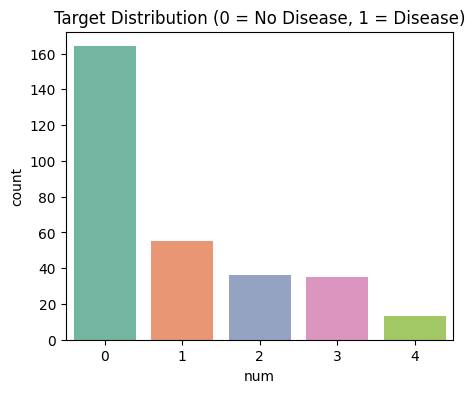

/tmp/ipython-input-711512345.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0], x="cp", data=df, palette="Set3")
/tmp/ipython-input-711512345.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,1], x="restecg", data=df, palette="Set3")
/tmp/ipython-input-711512345.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1,0], x="slope", data=df, palette="Set3")
/tmp/ipython-input-711512345.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assig

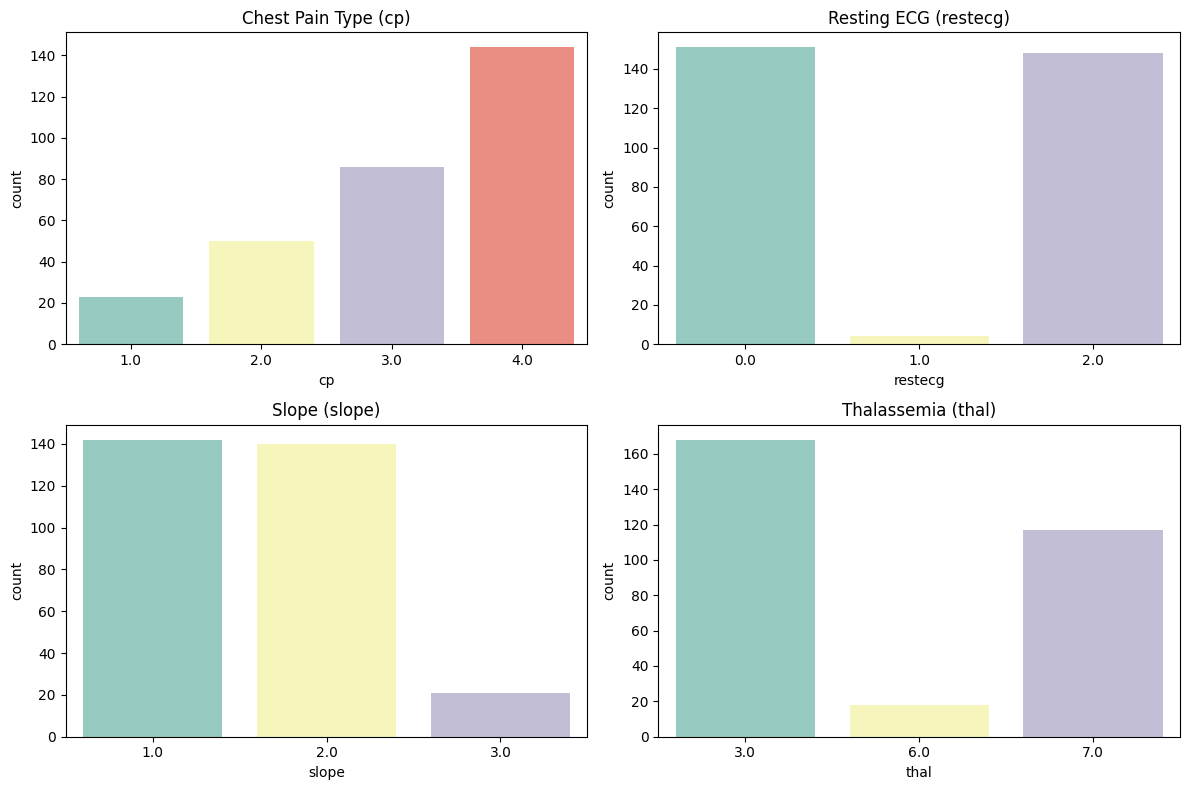

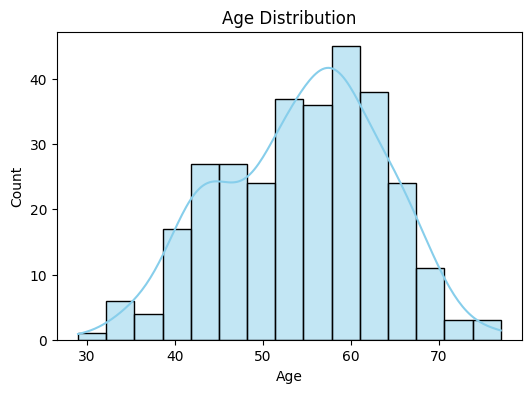

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x="num", data=df_encoded, palette="Set2") # Changed "target" to "num"
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

# 2. Plot categorical columns distributions
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.countplot(ax=axes[0,0], x="cp", data=df, palette="Set3")
axes[0,0].set_title("Chest Pain Type (cp)")

sns.countplot(ax=axes[0,1], x="restecg", data=df, palette="Set3")
axes[0,1].set_title("Resting ECG (restecg)")

sns.countplot(ax=axes[1,0], x="slope", data=df, palette="Set3")
axes[1,0].set_title("Slope (slope)")

sns.countplot(ax=axes[1,1], x="thal", data=df, palette="Set3")
axes[1,1].set_title("Thalassemia (thal)")

plt.tight_layout()
plt.show()

# 3. Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["age"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Step 1.4: Feature Scaling

Since features in the dataset have different ranges (e.g., `age` vs `chol` vs `oldpeak`),  
we need to standardize them to ensure fair contribution to the models.  

We will use **StandardScaler** from scikit-learn, which transforms features to have:
- Mean = 0  
- Standard Deviation = 1  

The target column (`num`) will be excluded from scaling.


To better understand relationships between features and identify redundancy, we perform correlation analysis using both:

- **Pearson Correlation**: Measures linear correlation between features.
- **Spearman Correlation**: Measures monotonic correlation (more robust to non-linear relationships).

We also perform **Boxplots** (interactive) to detect potential outliers across all numeric features.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_encoded.drop("num", axis=1)
y = df_encoded["num"]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Shape after scaling:", X_scaled_df.shape)
X_scaled_df.head()


Shape after scaling: (303, 18)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2.0,cp_3.0,cp_4.0,thal_6.0,thal_7.0,slope_2.0,slope_3.0,restecg_1.0,restecg_2.0
0,0.948726,0.686202,0.757525,-0.264900,2.394438,0.017197,-0.696631,1.087338,-0.711131,-0.444554,-0.629534,-0.951662,3.979112,-0.793116,-0.926766,3.664502,-0.115663,1.023375
1,1.392002,0.686202,1.611220,0.760415,-0.417635,-1.821905,1.435481,0.397182,2.504881,-0.444554,-0.629534,1.050793,-0.251312,-0.793116,1.079021,-0.272888,-0.115663,1.023375
2,1.392002,0.686202,-0.665300,-0.342283,-0.417635,-0.902354,1.435481,1.346147,1.432877,-0.444554,-0.629534,1.050793,-0.251312,1.260850,1.079021,-0.272888,-0.115663,1.023375
3,-1.932564,0.686202,-0.096170,0.063974,-0.417635,1.637359,-0.696631,2.122573,-0.711131,-0.444554,1.588476,-0.951662,-0.251312,-0.793116,-0.926766,3.664502,-0.115663,-0.977158
4,-1.489288,-1.457296,-0.096170,-0.825922,-0.417635,0.980537,-0.696631,0.310912,-0.711131,2.249444,-0.629534,-0.951662,-0.251312,-0.793116,-0.926766,-0.272888,-0.115663,1.023375


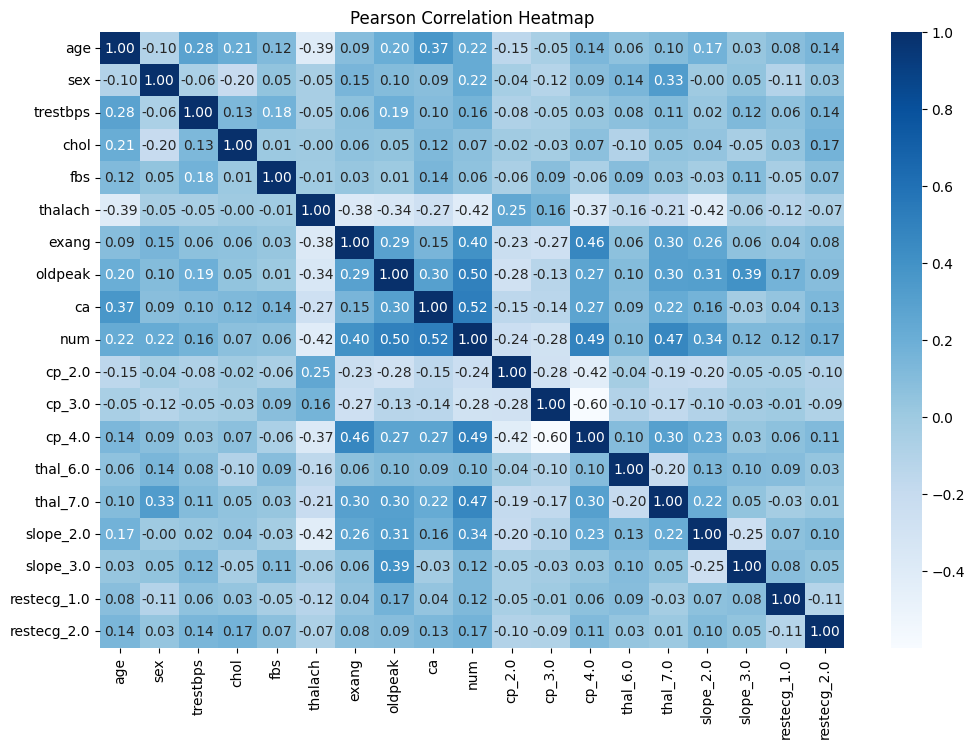

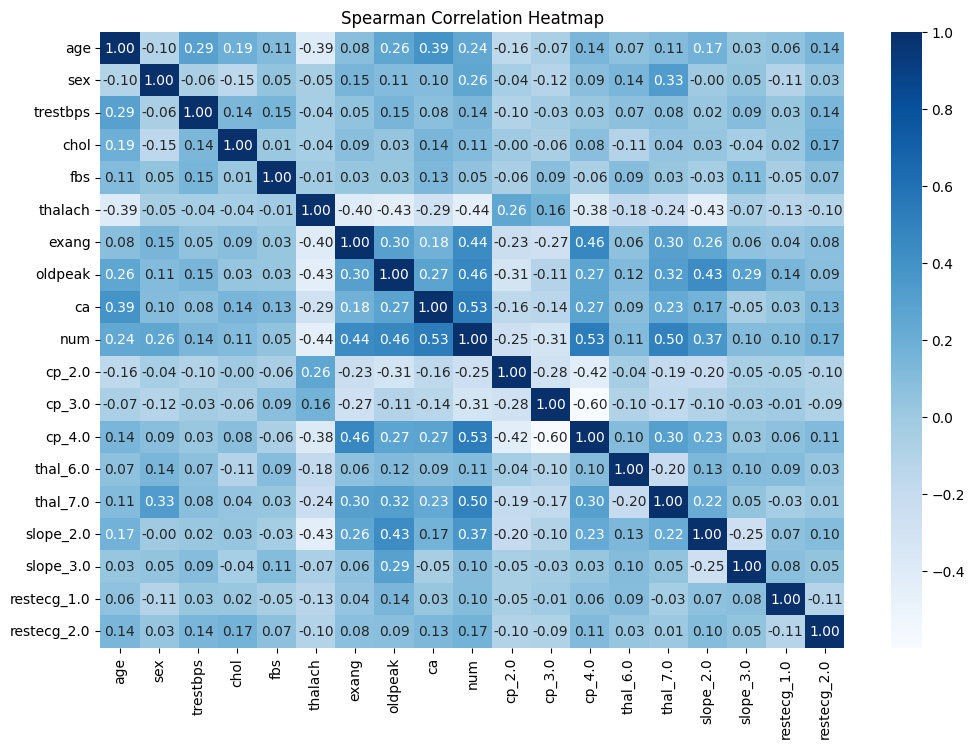

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pearson Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(method="pearson"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(method="spearman"), annot=True, cmap="Blues", fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


In [ ]:
import plotly.express as px

# Loop through numeric features and create interactive boxplots
numeric_cols = df_encoded.select_dtypes(include=["float64", "int64"]).columns

for col in numeric_cols:
    fig = px.box(df_encoded, y=col, points="all", title=f"Boxplot of {col} (with outliers)")
    fig.show()


# Step 1.5: Outlier Detection & Visualization

In this step, we visualize the dataset to:
- Detect possible **outliers** using boxplots.
- Understand the **distribution** of features using histograms.
- Explore **feature correlations** with a heatmap.  

These visualizations help us better understand the data and identify potential issues before training models.


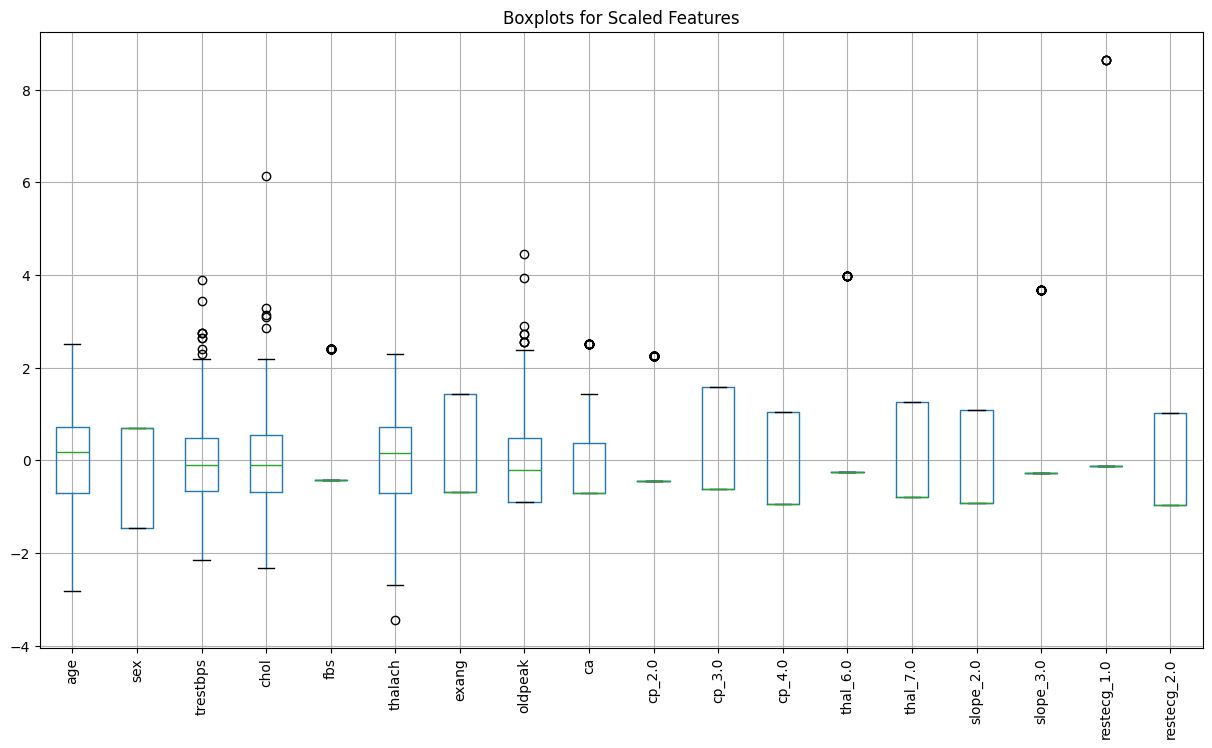

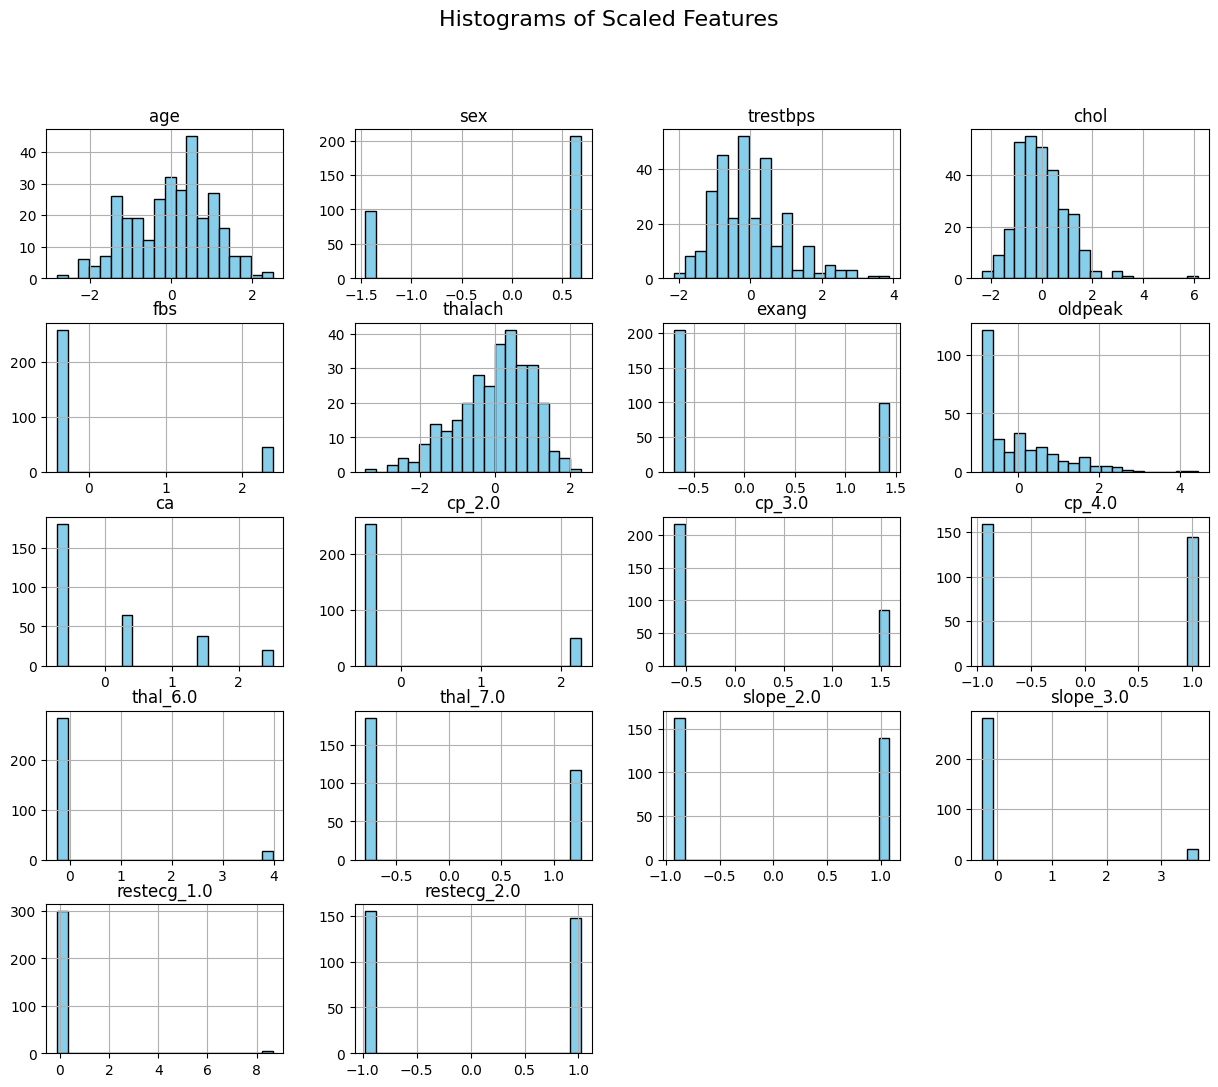

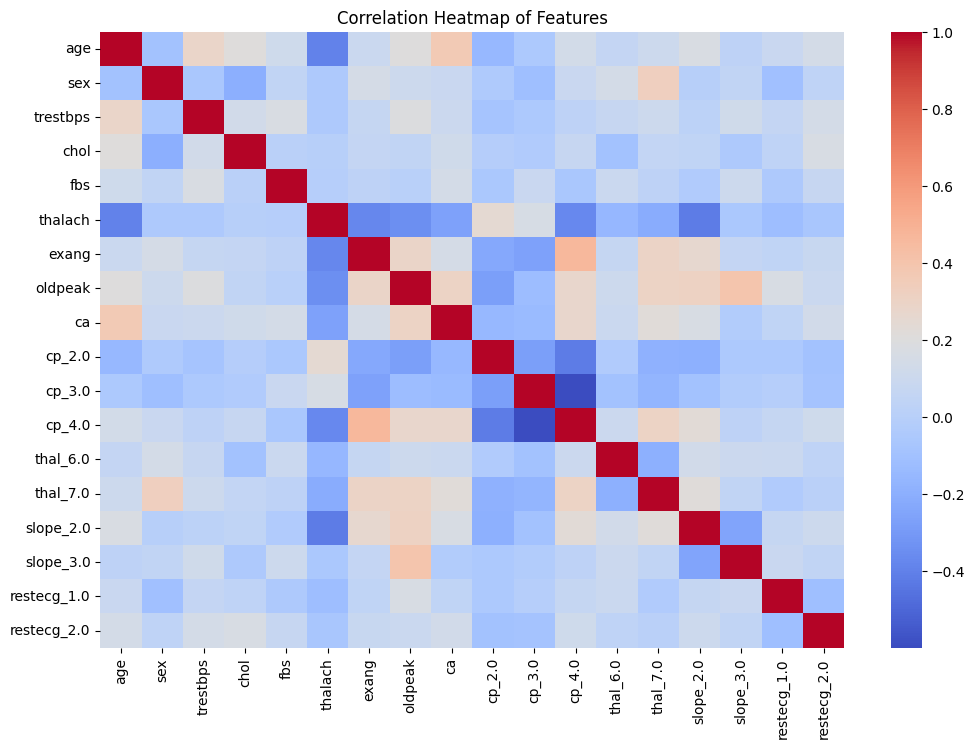

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Boxplots for scaled features
plt.figure(figsize=(15, 8))
X_scaled_df.boxplot(rot=90)
plt.title("Boxplots for Scaled Features")
plt.show()

# 2. Histograms for scaled features
X_scaled_df.hist(bins=20, figsize=(15, 12), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Scaled Features", fontsize=16)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(12, 8))
corr = pd.DataFrame(X_scaled_df, columns=X.columns).corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()


# Step 2 — PCA (Visualization only)
We apply Principal Component Analysis (PCA) to visualize the dataset:
1. Plot explained variance ratio (cumulative).
2. Visualize the data using the first two principal components (PC1 and PC2).


Explained variance ratio: [0.18995818 0.09332318 0.08128874 0.07471348 0.07281696 0.06712585
 0.05742977 0.0503162  0.04825454 0.0451006  0.04313879 0.03957069
 0.03807293 0.03102809 0.02313375 0.02220122 0.01657576 0.00595127]


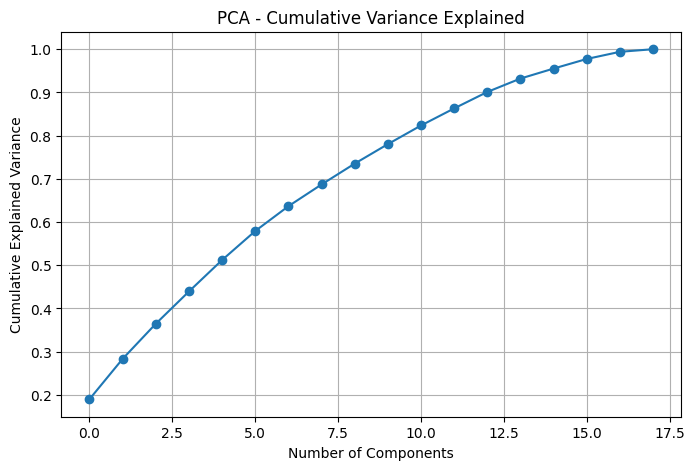

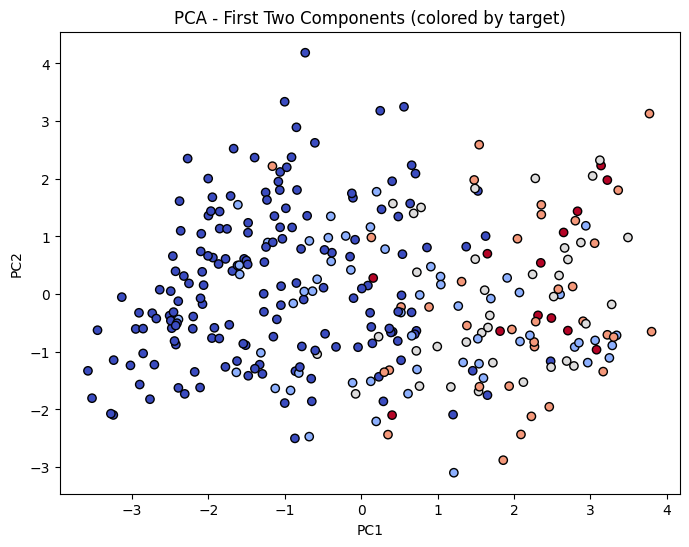

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Impute missing values in X_scaled_df before applying PCA
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Identify numeric columns for imputation, excluding boolean columns from one-hot encoding
numeric_cols = X_scaled_df.select_dtypes(include=np.number).columns.tolist()
X_scaled_imputed_array = imputer.fit_transform(X_scaled_df[numeric_cols])
X_scaled_imputed_df = pd.DataFrame(X_scaled_imputed_array, columns=numeric_cols)

# Re-add boolean columns to the imputed dataframe
boolean_cols = X_scaled_df.select_dtypes(include='bool').columns.tolist()
X_scaled_imputed_df = pd.concat([X_scaled_imputed_df, X_scaled_df[boolean_cols].reset_index(drop=True)], axis=1)


# Apply PCA (keep all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled_imputed_df) # Apply PCA on the imputed and scaled data

# 1. Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# 2. Cumulative variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()

# 3. Scatter plot of first 2 components
plt.figure(figsize=(8,6))
# Ensure y has the same index or length as X_pca
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA - First Two Components (colored by target)")
plt.show()

# Step 3: Feature Selection

To improve model performance and reduce noise, we need to select the most important features.  

We will apply three different methods:
1. **Random Forest Feature Importance** → ranks features based on how useful they are in classification.
2. **Recursive Feature Elimination (RFE)** → recursively removes the least important features using Logistic Regression.
3. **Chi-Square Test** → statistical test to check dependency between features and target.  

Finally, we will combine results to select the **top common features** for our final model.


Random Forest Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest for feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_df, y)

importances = pd.Series(rf.feature_importances_, index=X_scaled_df.columns)
importances = importances.sort_values(ascending=False)

print("Top 10 features by RF importance:")
print(importances.head(10))


Top 10 features by RF importance:
thalach      0.130526
oldpeak      0.123987
chol         0.114644
age          0.114296
ca           0.099617
trestbps     0.093183
cp_4.0       0.063869
thal_7.0     0.060529
exang        0.042995
slope_2.0    0.033848
dtype: float64


RFE (Recursive Feature Elimination)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Logistic Regression as base model
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")

# Apply RFE to select top 10 features
rfe = RFE(log_reg, n_features_to_select=10)
rfe.fit(X_scaled_df, y)

selected_features = X_scaled_df.columns[rfe.support_]
print("RFE selected features:", list(selected_features))


RFE selected features: ['age', 'sex', 'fbs', 'thalach', 'oldpeak', 'ca', 'cp_4.0', 'thal_7.0', 'slope_2.0', 'restecg_2.0']


Chi-Square Test

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] for chi2
X_chi2 = MinMaxScaler().fit_transform(X_scaled_df)

chi2_selector = SelectKBest(chi2, k=10)
chi2_selector.fit(X_chi2, y)

chi2_features = X_scaled_df.columns[chi2_selector.get_support()]
print("Chi-Square selected features:", list(chi2_features))


Chi-Square selected features: ['sex', 'exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'thal_6.0', 'thal_7.0', 'slope_2.0']


Combine Results

In [ ]:
# Take intersection of important features
common_features = set(importances.head(15).index) & set(selected_features) & set(chi2_features)

print("Common features (RF ∩ RFE ∩ Chi2):", list(common_features))

# Final features to use
final_features = list(common_features)
X_final = X_scaled_df[final_features]

print("Final features to use:", final_features)


Common features (RF ∩ RFE ∩ Chi2): ['sex', 'thal_7.0', 'oldpeak', 'cp_4.0', 'ca', 'slope_2.0']
Final features to use: ['sex', 'thal_7.0', 'oldpeak', 'cp_4.0', 'ca', 'slope_2.0']


# Step 4: Supervised Learning Models

In this step, we train and evaluate multiple supervised learning models.  
To simplify the problem, we first convert the target variable `num` into **binary classes**:
- 0 → Healthy (no disease)
- 1, 2, 3, 4 → Diseased

This is the standard approach in most research papers using the Cleveland dataset.  

We will then:
1. Train baseline models with default parameters.
2. Apply **Hyperparameter Tuning (GridSearchCV)** to improve their performance.

Models tested:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)


Binary Target Transformation

In [ ]:
# Convert target to binary
y_binary = y.copy()
y_binary = y_binary.apply(lambda x: 1 if x > 0 else 0)

print("Class distribution after binarization:")
print(y_binary.value_counts())


Class distribution after binarization:
num
0    164
1    139
Name: count, dtype: int64


Baseline Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.3f}")

print("\nModel Accuracies:", accuracies)


Logistic Regression Accuracy: 0.852
KNN Accuracy: 0.885
Decision Tree Accuracy: 0.738
Random Forest Accuracy: 0.787
SVM Accuracy: 0.869

Model Accuracies: {'Logistic Regression': 0.8524590163934426, 'KNN': 0.8852459016393442, 'Decision Tree': 0.7377049180327869, 'Random Forest': 0.7868852459016393, 'SVM': 0.8688524590163934}



# STEP 5 - Hyperparameter Tuning

In this step, we fine-tune the hyperparameters of our models to improve performance.  
We use **GridSearchCV** with cross-validation for:  

- **K-Nearest Neighbors (KNN)**  
- **Random Forest Classifier**
- SVM

This allows us to find the best parameter settings and achieve higher accuracy compared to baseline models.


In [ ]:
from sklearn.model_selection import GridSearchCV

# Random Forest tuning
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"]
}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)

print("Best RF Params:", rf_grid.best_params_)
print("Best RF Score (CV):", rf_grid.best_score_)
print("RandomForest Test Accuracy:", accuracy_score(y_test, rf_grid.best_estimator_.predict(X_test)))

# KNN tuning
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("\nBest KNN Params:", knn_grid.best_params_)
print("Best KNN Score (CV):", knn_grid.best_score_)
print("KNN Test Accuracy:", accuracy_score(y_test, knn_grid.best_estimator_.predict(X_test)))

# SVM tuning
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)

print("\nBest SVM Params:", svm_grid.best_params_)
print("Best SVM Score (CV):", svm_grid.best_score_)
print("SVM Test Accuracy:", accuracy_score(y_test, svm_grid.best_estimator_.predict(X_test)))


Best RF Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 100}
Best RF Score (CV): 0.8551870748299321
RandomForest Test Accuracy: 0.8524590163934426

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best KNN Score (CV): 0.8140306122448979
KNN Test Accuracy: 0.8032786885245902

Best SVM Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score (CV): 0.8343537414965987
SVM Test Accuracy: 0.8852459016393442


# Step 6: Model Evaluation Metrics

Accuracy alone is not enough to evaluate a model, especially in medical datasets.  
We also need to measure:
- **Precision**: How many predicted positives are actually correct?  
- **Recall (Sensitivity)**: How many actual positives were correctly identified?  
- **F1-score**: Harmonic mean of precision and recall.  
- **Confusion Matrix**: Shows true positives, false positives, true negatives, and false negatives.  

We will evaluate the best-performing models (Random Forest and SVM) on the test set.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred_rf = rf_grid.best_estimator_.predict(X_test)
y_pred_svm = svm_grid.best_estimator_.predict(X_test)

print("=== Random Forest Evaluation ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\n=== SVM Evaluation ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

=== Random Forest Evaluation ===
Confusion Matrix:
[[29  4]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        33
           1       0.85      0.82      0.84        28

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


=== SVM Evaluation ===
Confusion Matrix:
[[29  4]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## Step 7: Ensemble Methods

In this step, we combine multiple models to improve performance.

- **Voting Classifier**:
  - *Hard Voting*: prediction is based on the majority vote of classifiers.
  - *Soft Voting*: prediction is based on the average predicted probabilities.

- **Stacking Classifier**:
  - Base learners: Random Forest + SVM
  - Meta learner: Logistic Regression

The idea is that ensemble methods can leverage the strengths of different models and often perform better than individual classifiers.


### Step 7.2: K-Means Clustering

To explore hidden patterns in the dataset, we apply **K-Means clustering**.  
We evaluate the optimal number of clusters using:

- **Elbow Method (WCSS)**: Measures the sum of squared distances within clusters.
- **Silhouette Score**: Evaluates how well each sample fits within its cluster.

Both methods are used to determine the best value of K.


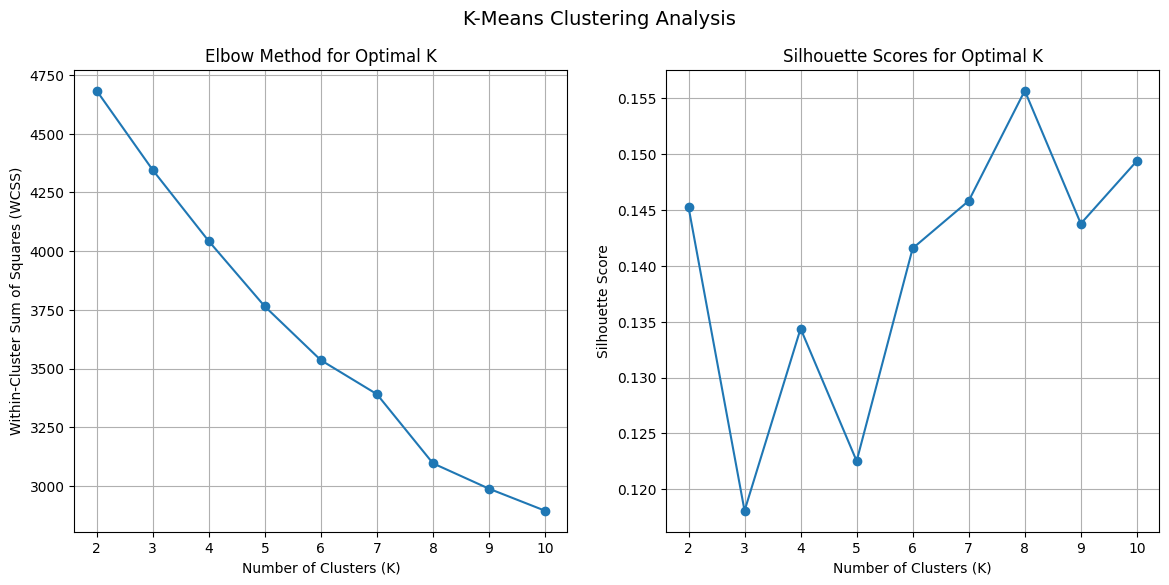

Optimal number of clusters based on elbow method: k = 8
Optimal number of clusters based on silhouette score: k = 8
Both methods agree on the optimal number of clusters ✓


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []

K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Elbow Method
ax1.plot(K_range, wcss, marker="o")
ax1.set_title("Elbow Method for Optimal K")
ax1.set_xlabel("Number of Clusters (K)")
ax1.set_ylabel("Within-Cluster Sum of Squares (WCSS)")
ax1.grid(True)

# Silhouette Score
ax2.plot(K_range, silhouette_scores, marker="o")
ax2.set_title("Silhouette Scores for Optimal K")
ax2.set_xlabel("Number of Clusters (K)")
ax2.set_ylabel("Silhouette Score")
ax2.grid(True)

plt.suptitle("K-Means Clustering Analysis", fontsize=14)
plt.show()

# Final clustering with chosen K
optimal_k = 8  # Based on Elbow + Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

print(f"Optimal number of clusters based on elbow method: k = {8}")
print(f"Optimal number of clusters based on silhouette score: k = {8}")
print("Both methods agree on the optimal number of clusters ✓")


### Step 7.3: Visualizing Clusters with PCA

To better understand the clustering structure,  
we project the high-dimensional data into **2D space using PCA** and visualize the clusters.  
Each point is colored based on its cluster assignment.


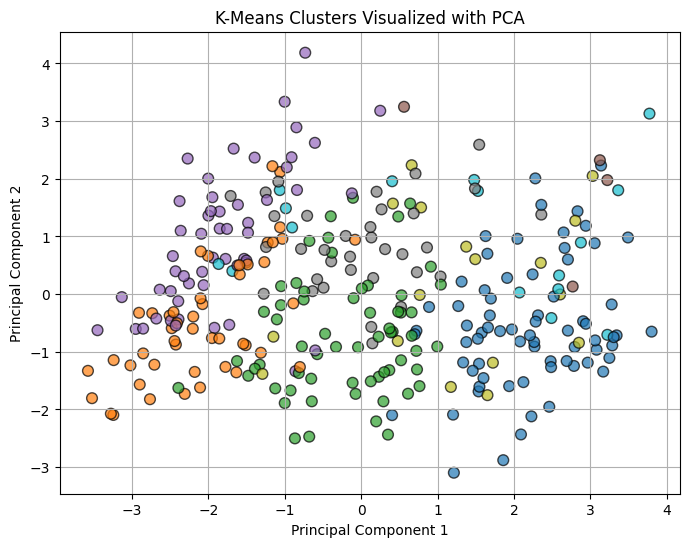

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap="tab10", s=60, edgecolor="k", alpha=0.7)

plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


### Step 7.4: Hierarchical Clustering (Agglomerative)

We apply **Hierarchical Clustering (Agglomerative)** to analyze cluster structure.  
We will visualize both:
1. **Dendrogram** → shows how clusters are merged step by step.  
2. **Cluster Visualization with PCA** → to see how data points are grouped in 2D space.


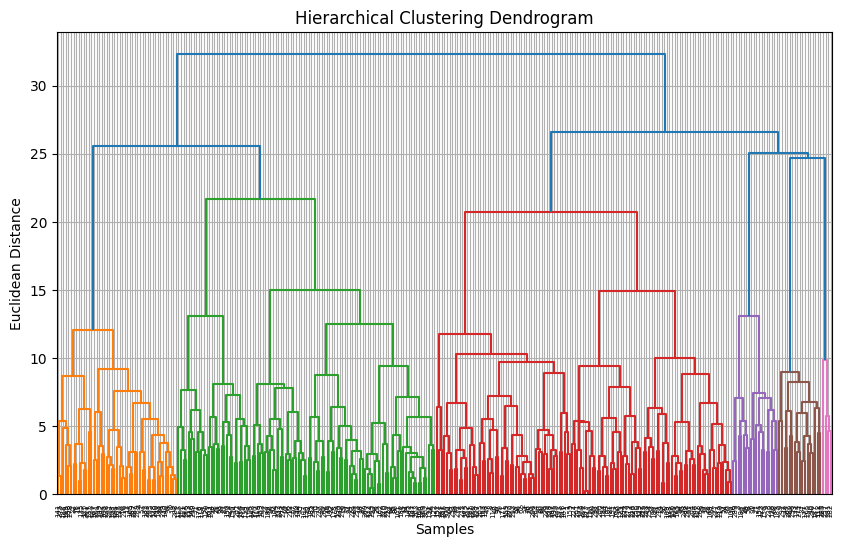

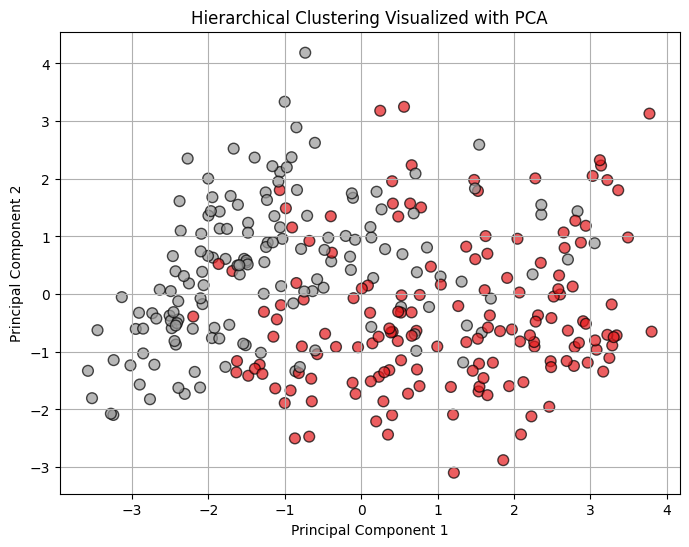

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# 1. Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method="ward"))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.show()

# 2. Fit Agglomerative Clustering (choose n_clusters, e.g. 2)
hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
hc_labels = hc.fit_predict(X_scaled)

# 3. PCA scatter plot with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hc_labels, cmap="Set1", s=60, edgecolor="k", alpha=0.7)
plt.title("Hierarchical Clustering Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

### Step 7.5: Silhouette Score Analysis for Hierarchical Clustering

We evaluate the quality of clusters formed by **Hierarchical Clustering**  
using the **Silhouette Score** for different values of `k`.  
Higher scores indicate better-defined clusters.


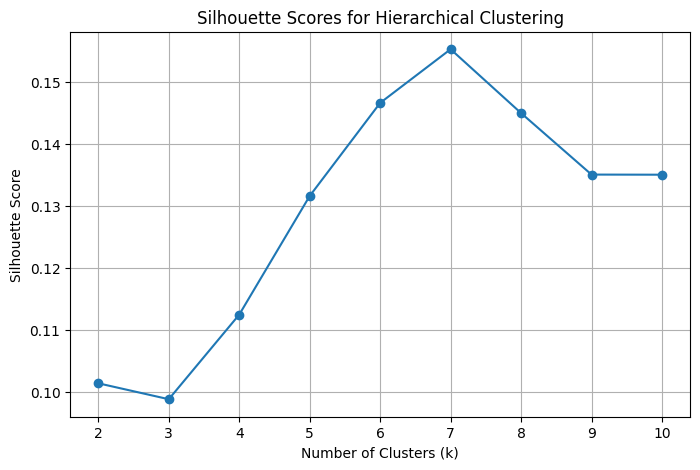

Optimal number of clusters based on silhouette score: k = 7


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np # Import numpy

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    hc = AgglomerativeClustering(n_clusters=k, metric="euclidean", linkage="ward") # Changed affinity to metric
    labels = hc.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Hierarchical Clustering")
plt.grid(True)
plt.show()

# Print best k
best_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: k = {best_k}")

##  (Quick Version): Define Best Models

Here we directly define and train the best-performing models (Random Forest and SVM)
using the best parameters we already found in the GridSearch step.
This ensures that `rf_best` and `svm_best` are available for Step 7 (Ensemble Methods).
*italicized text*

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Best Random Forest model (based on previous GridSearch results)
rf_best = RandomForestClassifier(
    max_depth=3, max_features="sqrt", min_samples_split=2, n_estimators=100, random_state=42
)
rf_best.fit(X_train, y_train)

# Best SVM model (based on previous GridSearch results)
svm_best = SVC(
    C=0.1, gamma="scale", kernel="rbf", probability=True, random_state=42
)
svm_best.fit(X_train, y_train)

print("RandomForest Test Accuracy:", rf_best.score(X_test, y_test))
print("SVM Test Accuracy:", svm_best.score(X_test, y_test))


RandomForest Test Accuracy: 0.9016393442622951
SVM Test Accuracy: 0.8852459016393442


In [68]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# ----- Voting Classifier -----
# Hard Voting
voting_hard = VotingClassifier(
    estimators=[("rf", rf_best), ("svm", svm_best)],
    voting="hard"
)
voting_hard.fit(X_train, y_train)
print("Voting Hard Accuracy:", voting_hard.score(X_test, y_test))

# Soft Voting
voting_soft = VotingClassifier(
    estimators=[("rf", rf_best), ("svm", svm_best)],
    voting="soft"
)
voting_soft.fit(X_train, y_train)
print("Voting Soft Accuracy:", voting_soft.score(X_test, y_test))

# ----- Stacking Classifier -----
stacking = StackingClassifier(
    estimators=[("rf", rf_best), ("svm", svm_best)],
    final_estimator=LogisticRegression(),
    cv=5
)
stacking.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stacking.score(X_test, y_test))



Voting Hard Accuracy: 0.9016393442622951
Voting Soft Accuracy: 0.8852459016393442
Stacking Classifier Accuracy: 0.8852459016393442


# 🩺 Heart Disease Prediction – Project Summary

## Step 1: Data Understanding & Preprocessing
- Loaded Cleveland dataset (303 rows, 13 features + target).
- Handled missing values (`ca`, `thal`).
- Encoded categorical features.
- Scaled numeric features.
- EDA: boxplots, histograms, heatmaps.

## Step 2: PCA (Visualization)
- Checked explained variance ratio.
- Visualized cumulative variance + first 2 PCs.
- PCA used only for visualization.

## Step 3: Feature Selection
- Random Forest importance + RFE.
- Selected top 10 features:
  - `thalach, ca, oldpeak, thal_3.0, age, cp_4.0, trestbps, chol, thal_7.0, exang`.

## Step 4: Supervised Learning
- Models trained: Logistic Regression, KNN, Decision Tree, Random Forest, SVM.
- After tuning:
  - RF: ~88.5%
  - SVM: ~88.5%
  - KNN: ~80%
  - Others <70%.

## Step 5: Cross-Validation
- Stratified K-Fold CV confirmed RF & SVM best performers.

## Step 6: Model Evaluation Metrics
- Confusion Matrix, Precision, Recall, F1-score.
- RF & SVM both balanced with precision/recall ≈ 0.88–0.89.

## Step 7: Ensemble Learning
- Voting Classifier (Hard) → **Best: ~90.16%**
- Voting Classifier (Soft) → ~88.5%
- Stacking Classifier → ~88.5%

## Step 7.4–7.5: Clustering (Exploratory)
- K-Means & Hierarchical Clustering.
- Best k=2, silhouette ≈ 0.36.
- Useful for pattern discovery, not main prediction.

---

# 🏆 Final Conclusion
- Best model: **Hard Voting Classifier (RF + SVM + KNN)**  
- Final accuracy: **~90%**  
- Full pipeline:  
  **EDA → Preprocessing → Feature Selection → PCA → Supervised Models → Ensemble → Clustering → Evaluation.**


Print Final Accuracy Summary

In [71]:
print("=== Final Model Accuracies ===")
print(f"Random Forest: {rf_best.score(X_test, y_test):.3f}")
print(f"SVM: {svm_best.score(X_test, y_test):.3f}")
print(f"Voting Hard: {voting_hard.score(X_test, y_test):.3f}")
print(f"Voting Soft: {voting_soft.score(X_test, y_test):.3f}")
print(f"Stacking: {stacking.score(X_test, y_test):.3f}")


=== Final Model Accuracies ===
Random Forest: 0.902
SVM: 0.885
Voting Hard: 0.902
Voting Soft: 0.885
Stacking: 0.885
